# Convolutional Neural Networks

In [1]:
#Realizaremos un ejercicio descrito en el blog www.aprendemachinelearning.com para hacer reconocimiento de imágenes.

# Importar Librerías

In [12]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow import keras

# Cargar set de Imágenes

In [14]:
dirname = os.path.join(os.getcwd(), 'toses-images')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\dev\tfg\src\poc\toses-images\
C:\dev\tfg\src\poc\toses-images\DETECTABLE 1
C:\dev\tfg\src\poc\toses-images\NO-DETECTABLE 2898
Directorios leidos: 2
Imagenes en cada directorio [2899, 2897]
suma Total de imagenes en subdirs: 5796


# Creamos las etiquetas

In [15]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  5796


In [16]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 DETECTABLE
1 NO-DETECTABLE


In [17]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


# Creamos Sets de Entrenamiento y Test

In [18]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (5216, 217, 223, 4) (5216,)
Testing data shape :  (580, 217, 223, 4) (580,)


Text(0.5, 1.0, 'Ground Truth : 1')

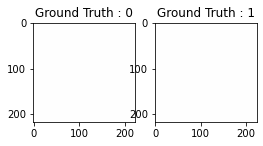

In [19]:
plt.figure(figsize=[4,4])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [20]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [21]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [22]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [23]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(4694, 217, 223, 4) (522, 217, 223, 4) (4694, 2) (522, 2)


# Creamos el modelo de CNN

In [24]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [25]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(217,223,4)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [26]:
sport_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 217, 223, 32)      1184      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 217, 223, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 109, 112, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 109, 112, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 390656)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                12501024  
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32)               

In [27]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/6
74/74 [==============================] - 206s 3s/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4828
Epoch 2/6
74/74 [==============================] - 215s 3s/step - loss: 0.6931 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4828
Epoch 3/6
74/74 [==============================] - 203s 3s/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.4828
Epoch 4/6
74/74 [==============================] - 235s 3s/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4828
Epoch 5/6
74/74 [==============================] - 222s 3s/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4828
Epoch 6/6
58/74 [======================>.......] - ETA: 45s - loss: 0.6931 - accuracy: 0.5003

In [8]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("toses_mnist.h5py")

NameError: name 'sport_model' is not defined

# Evaluamos la red

In [7]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

NameError: name 'sport_model' is not defined

In [108]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6935369372367859
Test accuracy: 0.4724137783050537


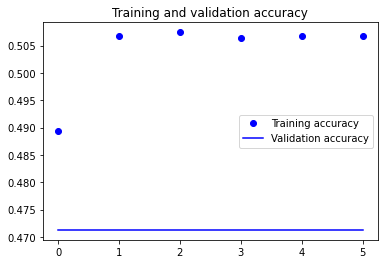

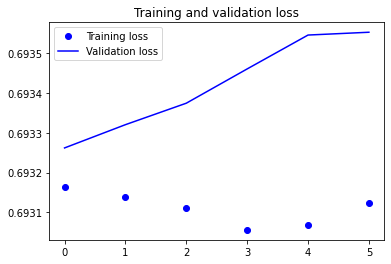

In [109]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [110]:
predicted_classes2 = sport_model.predict(test_X)

In [111]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [112]:
predicted_classes.shape, test_Y.shape

((580,), (580,))

# Aprendamos de los errores: Qué mejorar

Found 274 correct labels


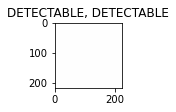

In [113]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(217,223,4), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 306 incorrect labels


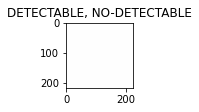

In [115]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(217,223,4), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [116]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.47      1.00      0.64       274
     Class 1       0.00      0.00      0.00       306

    accuracy                           0.47       580
   macro avg       0.24      0.50      0.32       580
weighted avg       0.22      0.47      0.30       580



C:\Users\epasc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\epasc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\epasc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prediccion de una nueva imagen

In [6]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['audio-prueba-novia-juan/WhatsApp Audio 2022-06-07 at 10.33.36 AM.png']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (217,223),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

NameError: name 'sport_model' is not defined